Dataset Used : https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

### Column	Description:
customerID	Unique ID assigned to each customer
gender	Gender of the customer
SeniorCitizen	Indicates if the customer is a senior citizen
Partner	Indicates if the customer has a partner
Dependents	Indicates if the customer has dependents
tenure	Number of months the customer has stayed with the company
PhoneService	Indicates if the customer has a phone service
MultipleLines	Indicates if the customer has multiple phone lines
InternetService	Internet service provider
OnlineSecurity	Indicates if the customer has online security
OnlineBackup	Indicates if the customer has online backup
DeviceProtection	Indicates if the customer has device protection
TechSupport	Indicates if the customer has tech support
StreamingTV	Indicates if the customer has streaming TV service
StreamingMovies	Indicates if the customer has streaming movies service
Contract	Contract term of the customer
PaperlessBilling	Indicates if the customer has paperless billing
PaymentMethod	Payment method used by the customer
MonthlyCharges	Monthly amount charged to the customer
TotalCharges	Total amount charged to the customer over the entire tenure
Churn	Indicates if the customer has churned

### Objective of this churn analysis: To identify the reasons behind customer churns

### 1. Installing all the required libraries

In [4]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

### 2. Importing all the required libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Loading the csv data file

In [6]:
df_raw = pd.read_csv("Customer Churn.csv")

### 4. Exploring the data

In [7]:
df_raw.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df_raw.isnull().sum().sum()  ### to check and reconfirm total null values

0

In [24]:
print(df_raw.duplicated().sum()) ### there is no duplicates in the whole data but lets check on the unique column CustomerId too
df_raw['customerID'].duplicated().sum()

0


0

### Observation

1. The dataset contains 7,043 rows with 21 columns.2.  The TotalCharges feature requires a data type adjustment (object → float)
3. ✅ The data appears to have no missing values, but further verification is needed during the detailed exploration ste
4. 🆗 No duplicate records were fou
5. Seniorcitizen column coming as int64 coz value are in 0 and 1 which we will change to yes and no to make it uniform
nd.

### 5. Data Transformation

In [11]:
## Convert TotalCharges from object to float datatype

df_raw['TotalCharges'].astype("float")

ValueError: could not convert string to float: ' '

### it means there are some string values present in column which is causing the issue,
we can check the same in raw data there are some blank values where tenure is 0

In [12]:
df_raw['TotalCharges'] = df_raw['TotalCharges'].replace(" ",0)

In [13]:
df_raw['TotalCharges'] = df_raw['TotalCharges'].astype("float")

In [14]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
### Now lets change the SeniorCitizen values from 0,1 to No and yes

In [16]:
def change(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'

In [17]:
df_raw['SeniorCitizen'] = df_raw['SeniorCitizen'].apply(change)

In [18]:
df_raw.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [19]:
###lets check the distribution of data for numeric colummns

df_raw.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### 6. Churn Analysis

#### 1. People Churned

In [20]:
df_raw['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

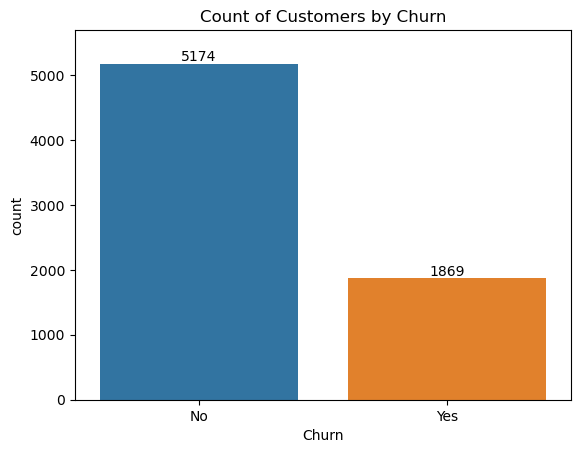

In [22]:
cnt_plot = sns.countplot(data = df_raw, x = 'Churn')
cnt_plot.bar_label(cnt_plot.containers[0],label_type = 'edge')
cnt_plot.margins(y = 0.1)
plt.title("Count of Customers by Churn")
plt.show()

ValueError: could not convert string to float: 'No'

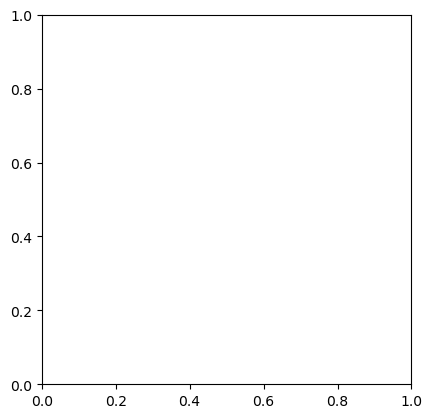

In [23]:
plt.pie(df_raw['Churn'])
plt.show()

In [25]:
### giving error : ValueError: could not convert string to float: 'No'

## lets groupby the churn values

In [26]:
grp_df  = df_raw.groupby('Churn').agg({'Churn' : 'count'}).rename(columns = {'Churn':'Count'})
grp_df

,Count
Churn,
No,5174
Yes,1869


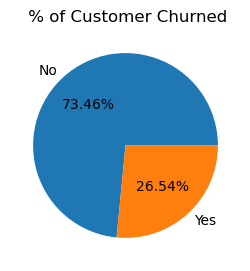

<Figure size 200x200 with 0 Axes>

In [27]:
plt.figure(figsize = (3,3))
plt.pie(grp_df['Count'],labels = grp_df.index, autopct = "%.2f%%" )
plt.title(" % of Customer Churned")
plt.figure(figsize = (2,2))
plt.show()

##### 26.54 % customer churned out, we'll find out the reason behind it

#### 2. Checking By Gender

In [28]:
df_raw['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

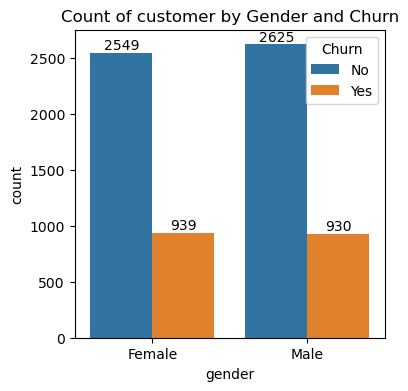

In [29]:
plt.figure( figsize = (4,4))
gender_cnt_plt = sns.countplot(data = df_raw , x = 'gender',hue = 'Churn')

# Add labels for each bar container
for container in gender_cnt_plt.containers:
    gender_cnt_plt.bar_label(container, label_type='edge')
plt.title ("Count of customer by Gender and Churn")
plt.show()

In [30]:
counts = df_raw.groupby(['gender', 'Churn']).size().unstack(fill_value=0)
counts

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


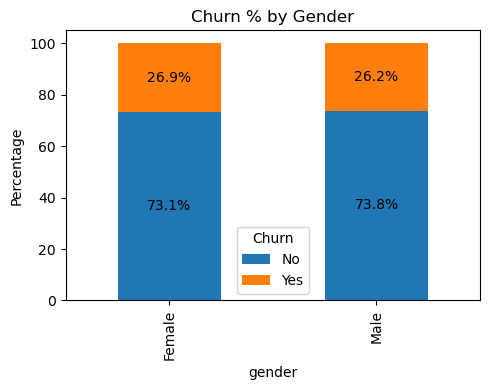

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get counts
counts = df_raw.groupby(["gender", "Churn"]).size().unstack(fill_value=0)

# Step 2: Convert to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar chart
ax = percentages.plot(kind="bar", stacked=True, figsize=(5,4))

# Step 4: Add labels
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", label_type="center")

plt.ylabel("Percentage")
plt.title("Churn % by Gender")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


##### There is no particular pattern here on the churn by gender, churn rate is almost similar gender wise

#### 3. Checking by seniorCitizen

In [32]:
df_raw['SeniorCitizen'].value_counts()

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

In [33]:
df_raw.groupby(['SeniorCitizen','Churn']).size()

SeniorCitizen  Churn
No             No       4508
               Yes      1393
Yes            No        666
               Yes       476
dtype: int64

In [34]:
senior_churn_count = df_raw.groupby(['SeniorCitizen','Churn']).size().unstack()
senior_churn_count

Churn,No,Yes
SeniorCitizen,,
No,4508,1393
Yes,666,476


In [35]:
per = round(senior_churn_count.div(senior_churn_count.sum(axis = 1),axis = 0)*100,2)
per

Churn,No,Yes
SeniorCitizen,,
No,76.39,23.61
Yes,58.32,41.68


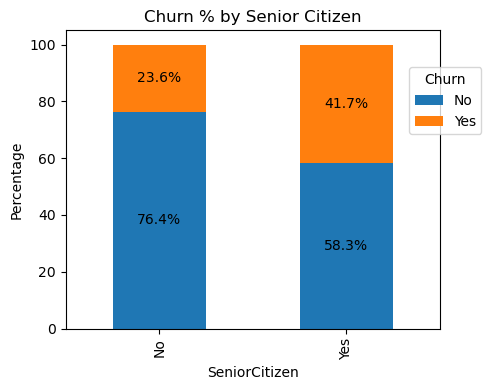

In [36]:
ax = per.plot(kind = 'bar',stacked = 'True',figsize = (5,4))
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", label_type="center")

plt.ylabel("Percentage")
plt.title("Churn % by Senior Citizen")
plt.legend(title="Churn" , bbox_to_anchor = (0.9,0.9))
plt.tight_layout()
plt.show()

##### here we can clearly see that senior citizen churned more as compared to other customers

In [37]:
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### 4. Check by Contract type

In [38]:
df_raw['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [39]:
pd.crosstab(df_raw['Contract'], df_raw['Churn'])


Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [40]:
contract_grp = df_raw.groupby(['Contract','Churn']).agg({'Churn':'count'}).rename(columns = {'Churn':'Total'})
contract_grp

Total
Contract       Churn       
Month-to-month No      2220
               Yes     1655
One year       No      1307
               Yes      166
Two year       No      1647
               Yes       48

In [41]:
contract_grp_unstacked = contract_grp.unstack()
print(contract_grp_unstacked)
round(contract_grp_unstacked.div(contract_grp_unstacked.sum(axis= 1),axis = 0) *100,2)

               Total      
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


Total       
Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83

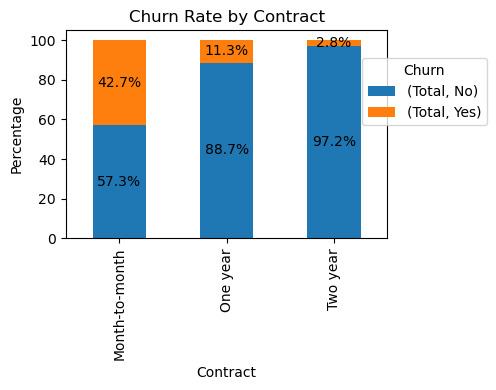

In [42]:
ax = round(contract_grp_unstacked.div(contract_grp_unstacked.sum(axis= 1),axis = 0) *100,2).plot(kind = 'bar',stacked = True,figsize = (5,4))

for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", label_type="center")
plt.ylabel('Percentage')
plt.title("Churn Rate by Contract")
plt.legend(title="Churn",bbox_to_anchor = (0.9,0.9))
plt.tight_layout()
plt.show()

##### Above data clearly shows that people gets churned high with Montly subscription as compared to 1 year or 2 year subscription

##### recommendations: if customer can be switched or convinced to upgrade or subscribe to yeraly subscrption instead of monthly, we an reduce the churn rate subsequently.

#### 5. Checking by PaymentMethod

In [43]:
df_raw['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [44]:
payment_df = df_raw.groupby(['PaymentMethod','Churn']).size().unstack()
payment_df

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [45]:
payment_df_Per = round(payment_df.div(payment_df.sum(axis = 1),axis = 0)*100,2)
payment_df_Per

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11


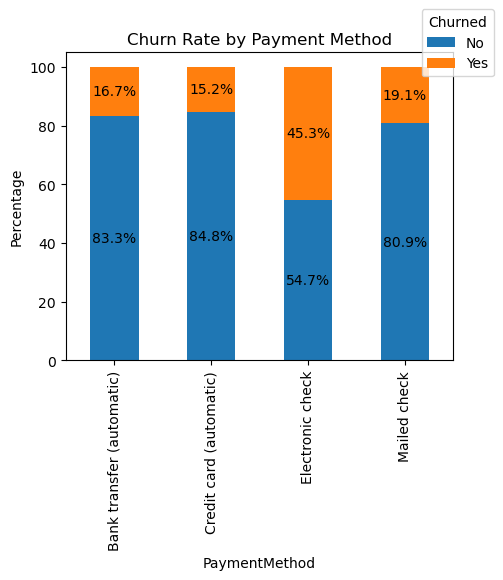

In [46]:
ax = payment_df_Per.plot(kind= 'bar', stacked = True,figsize = (5,4))
for c in ax.containers:
    ax.bar_label(c,fmt = '%.1f%%',label_type = "center")
plt.ylabel('Percentage')
plt.title('Churn Rate by Payment Method')
plt.legend(title = 'Churned',bbox_to_anchor = (0.9,0.9))
plt.show()

##### Above data clearly shows that people gets churned high with manual payment method (specially electronic check) as compared to automatic payment setup.

#### 6. Data distribution across different categories

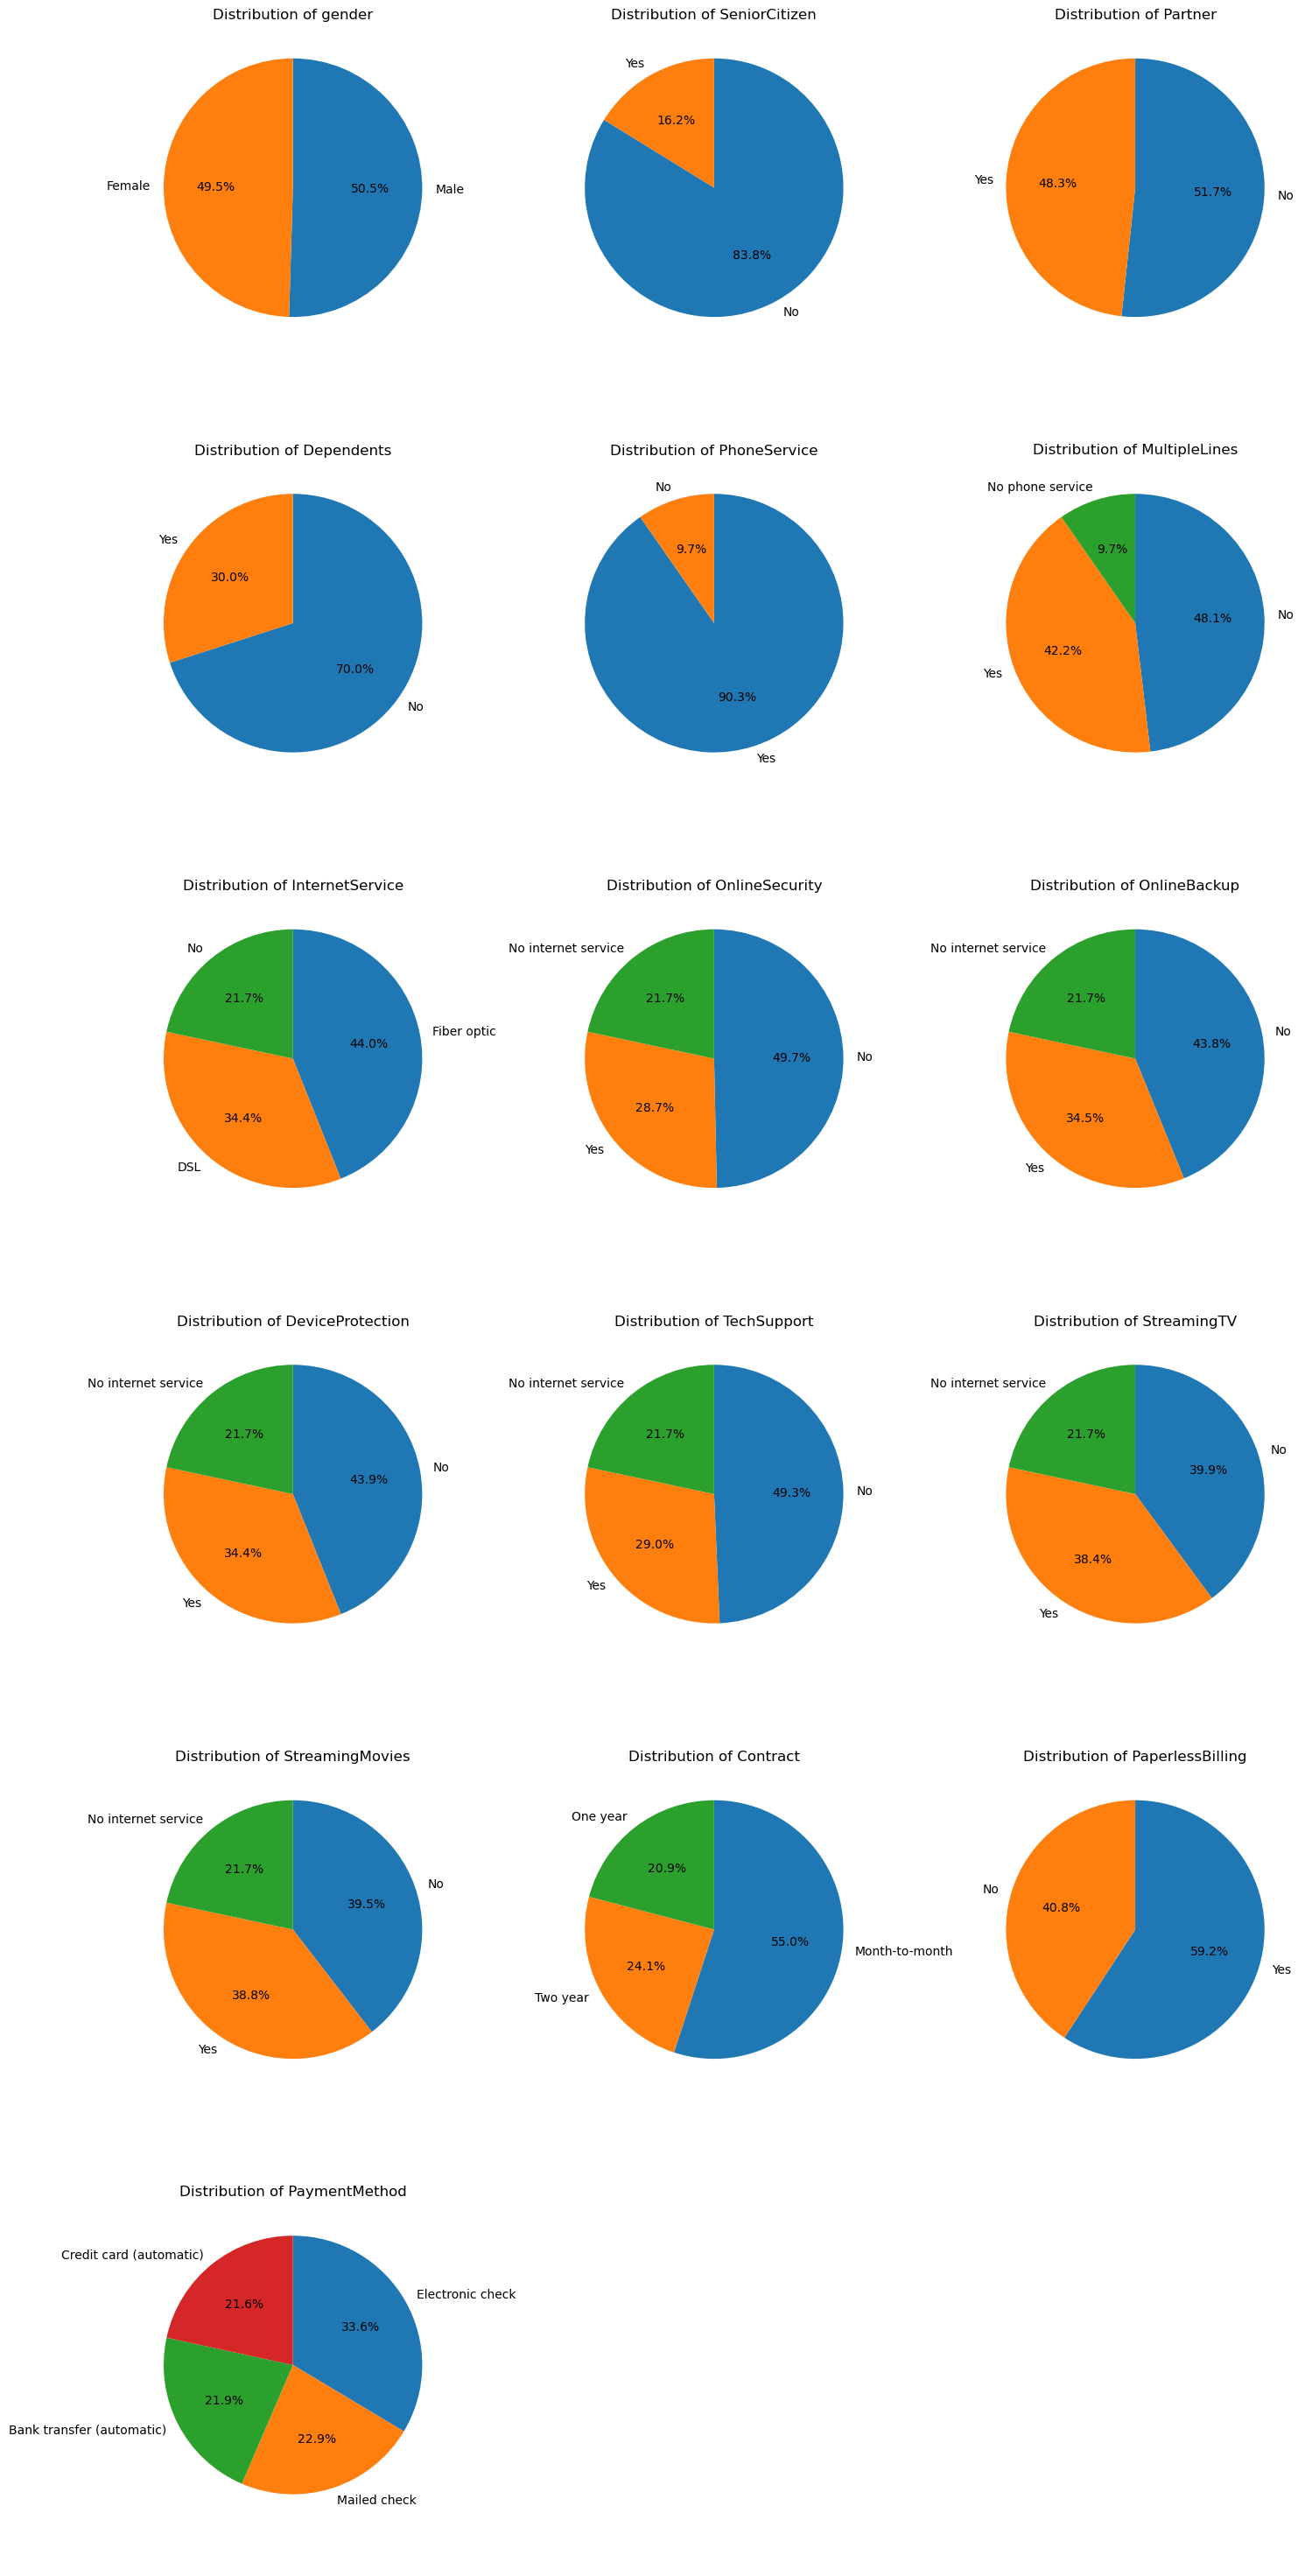

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Columns to analyze
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
        'Contract', 'PaperlessBilling', 'PaymentMethod']

# Grid size
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

for ax, col in zip(axes.flatten(), cols):
    # Value counts for each category
    dist = df_raw[col].value_counts()
    
    # Plot pie chart
    ax.pie(dist, labels=dist.index, autopct='%1.1f%%', startangle=90, counterclock=False)
    ax.set_title(f"Distribution of {col}")

# Remove empty subplots if any
for ax in axes.flatten()[len(cols):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


1. Gender — Distribution is very balanced → gender is likely not a dominant factor in churn but will check on this.2. Senior Citizens — Majority are not senior citizens. The senior group is smaller but still important to analyze for potentially higher churn rates
3. Partner — Almost half of the customers have a partner → may be associated with greater contract stability
4. Dependents — Most customers do not have dependents → may increase flexibility in switching service
5. Phone Service — Most customers subscribe to phone service, with only a small portion without it.
6. Multiple Lines — Nearly half have only one line, while 42% have multiple lines.
7.  Internet Service — Fiber optic is most popular
8. Add-on Services — Many customers do not take add-ons even if they have internet → upselling opportunity.
9. Contract Type — Majority are on month-to-month contracts → more vulnerable churn.
10. Paperless Billing — Most customers use paperless billing → easier payments, but may be linked to higher churn due to ease of canellation.
11.  Payment Mthod :> around 34  percentt cs using electronic checkc&d  around 43 percent automatic payments.

#### 7. Churn Analysis by categorial columns

<Figure size 500x300 with 0 Axes>

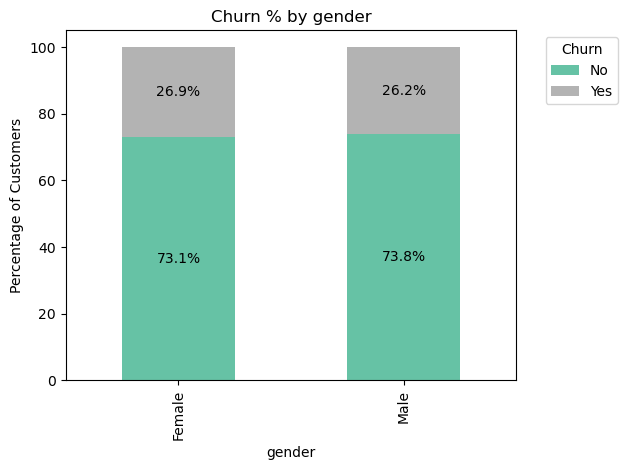

<Figure size 500x300 with 0 Axes>

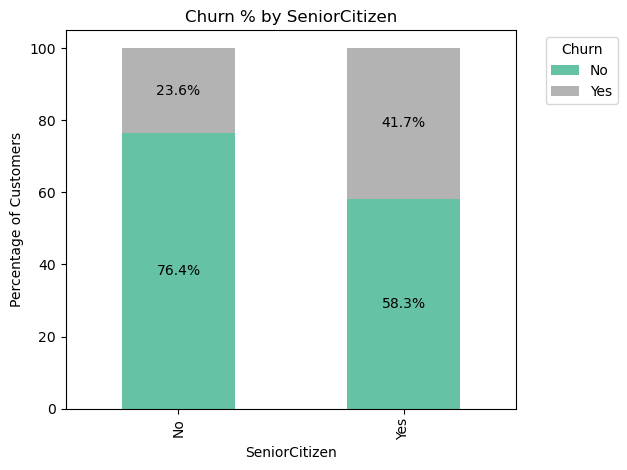

<Figure size 500x300 with 0 Axes>

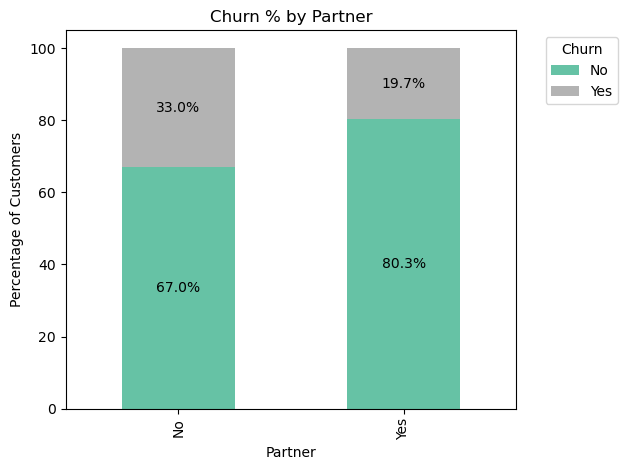

<Figure size 500x300 with 0 Axes>

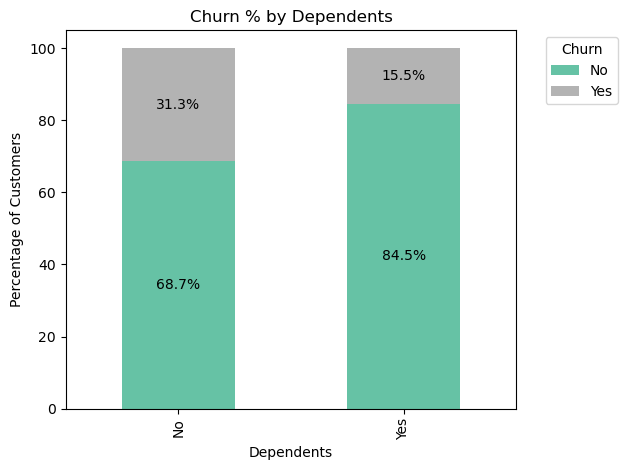

<Figure size 500x300 with 0 Axes>

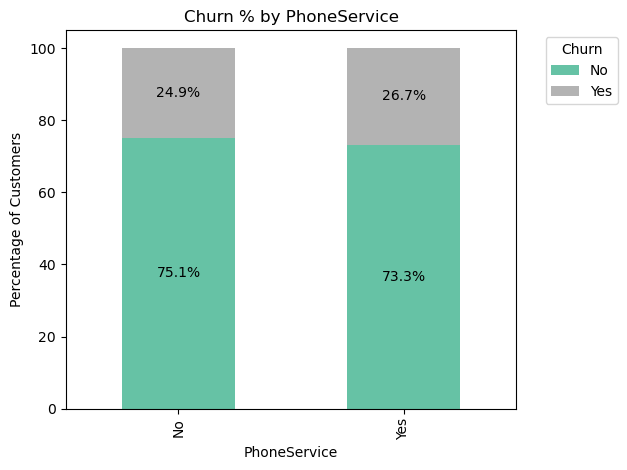

<Figure size 500x300 with 0 Axes>

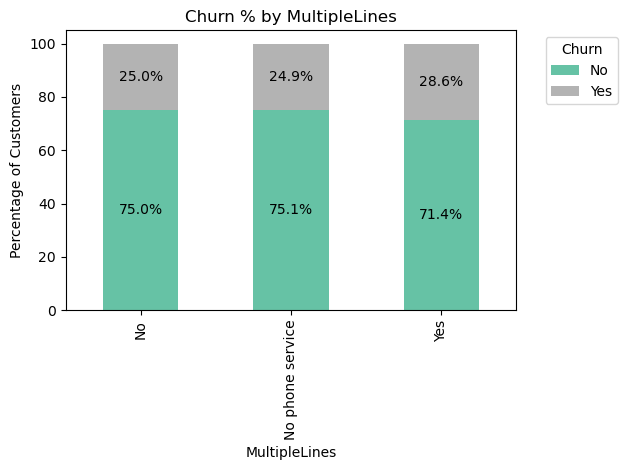

<Figure size 500x300 with 0 Axes>

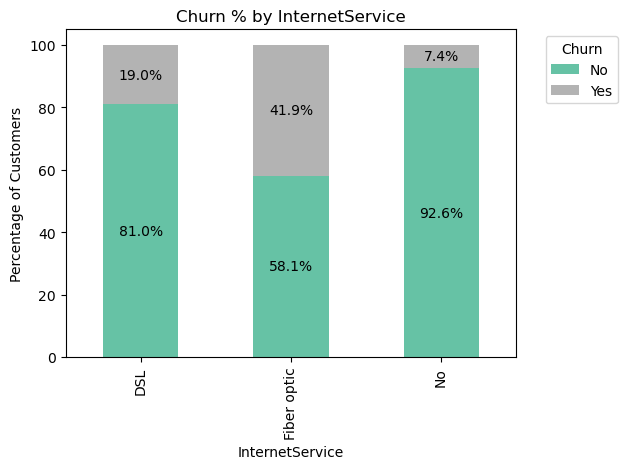

<Figure size 500x300 with 0 Axes>

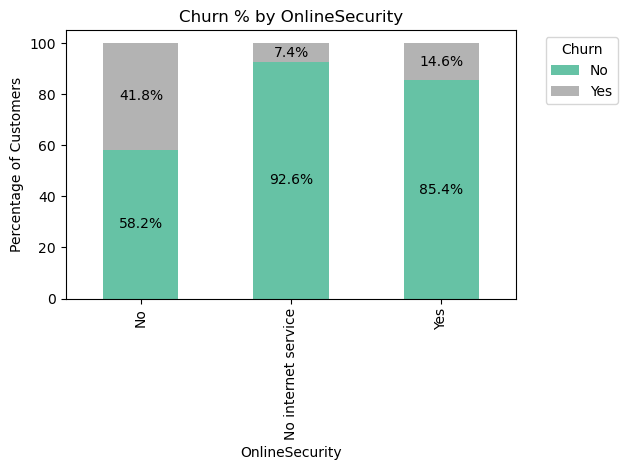

<Figure size 500x300 with 0 Axes>

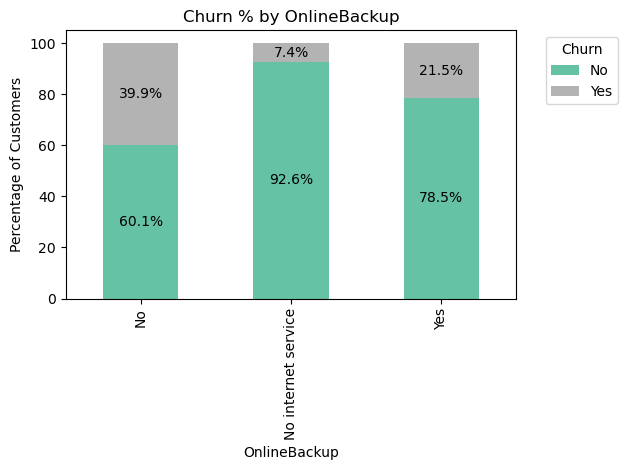

<Figure size 500x300 with 0 Axes>

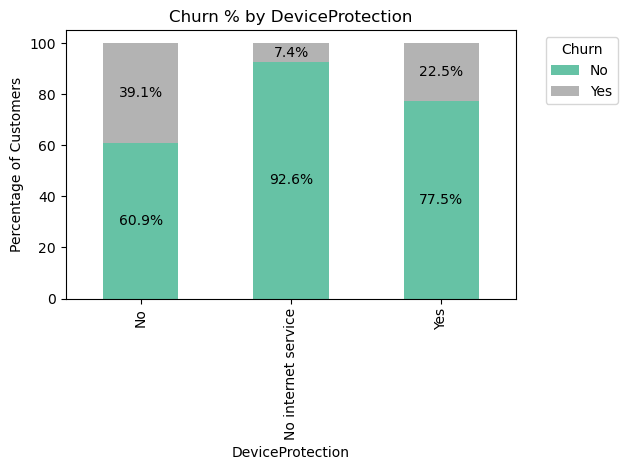

<Figure size 500x300 with 0 Axes>

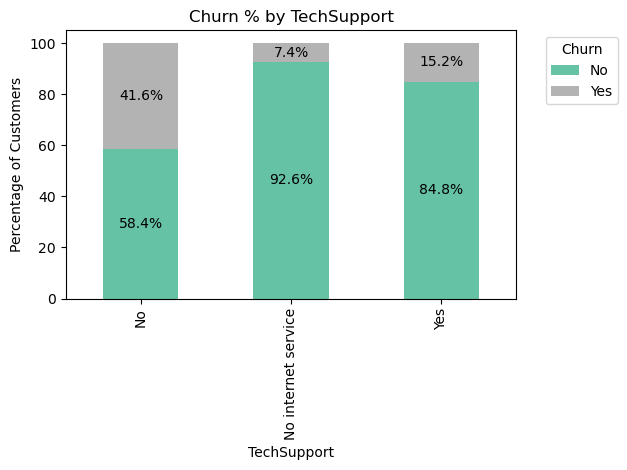

<Figure size 500x300 with 0 Axes>

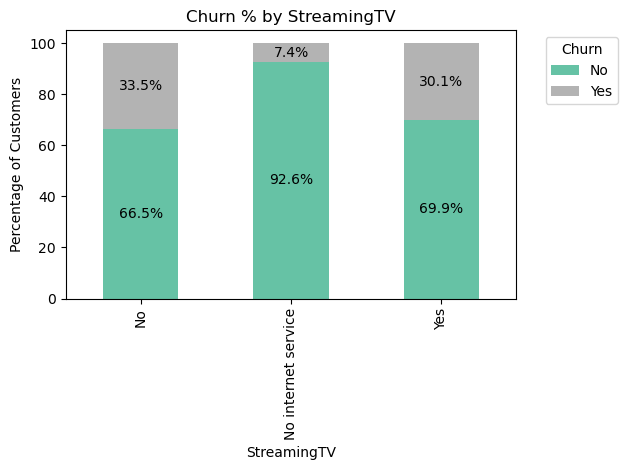

<Figure size 500x300 with 0 Axes>

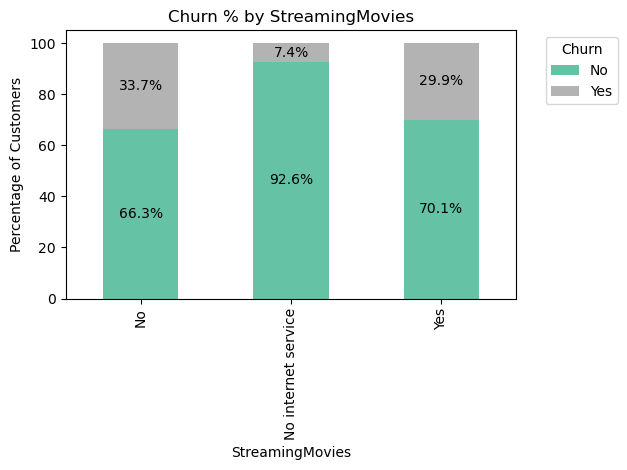

<Figure size 500x300 with 0 Axes>

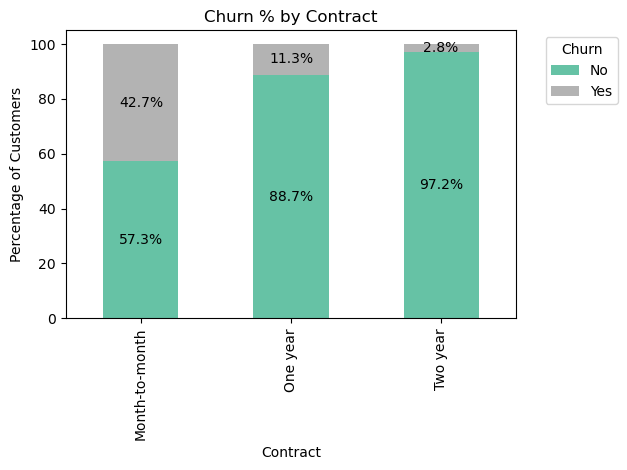

<Figure size 500x300 with 0 Axes>

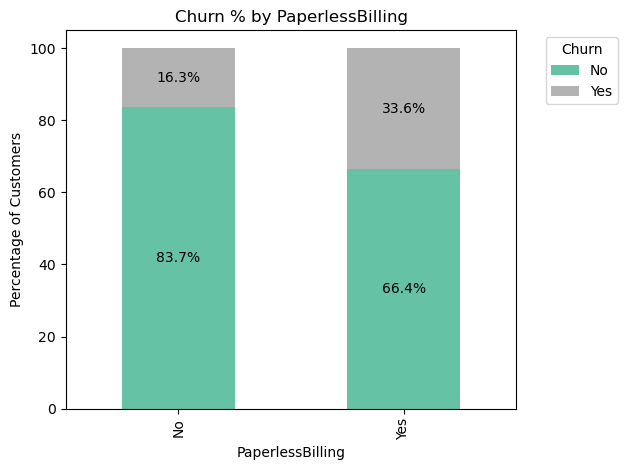

<Figure size 500x300 with 0 Axes>

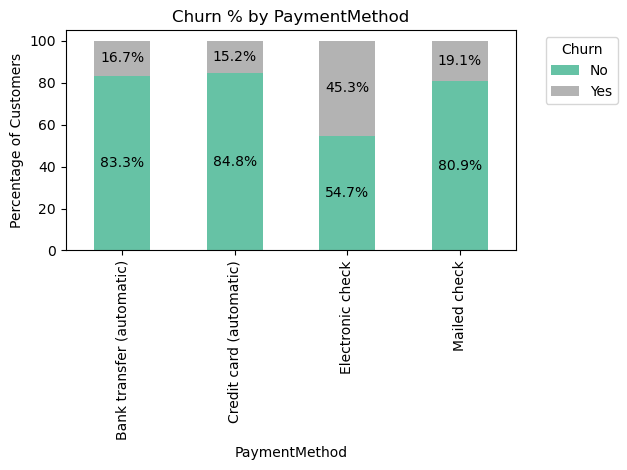

In [53]:

# List of categorical columns I want to analyze
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
        'Contract', 'PaperlessBilling', 'PaymentMethod']

def churn_distribution_plots(df, cols, churn_col='Churn'):
    for col in cols:
        plt.figure(figsize=(5,3))
        
        # --- Option 1: Count distribution (stacked bar) ---
        ax = pd.crosstab(df[col], df[churn_col], normalize='index') * 100
        ax.plot(kind='bar', stacked=True, colormap="Set2")
        
        # Add labels
        for container in plt.gca().containers:
            plt.gca().bar_label(container, fmt="%.1f%%", label_type="center")
        
        plt.title(f"Churn % by {col}")
        plt.ylabel("Percentage of Customers")
        plt.xlabel(col)
        plt.legend(title="Churn", bbox_to_anchor=(1.05,1), loc='upper left')
        plt.tight_layout()
        plt.show()

# Call the function
churn_distribution_plots(df_raw, cols)


#### 8. analysis using subplots for single view

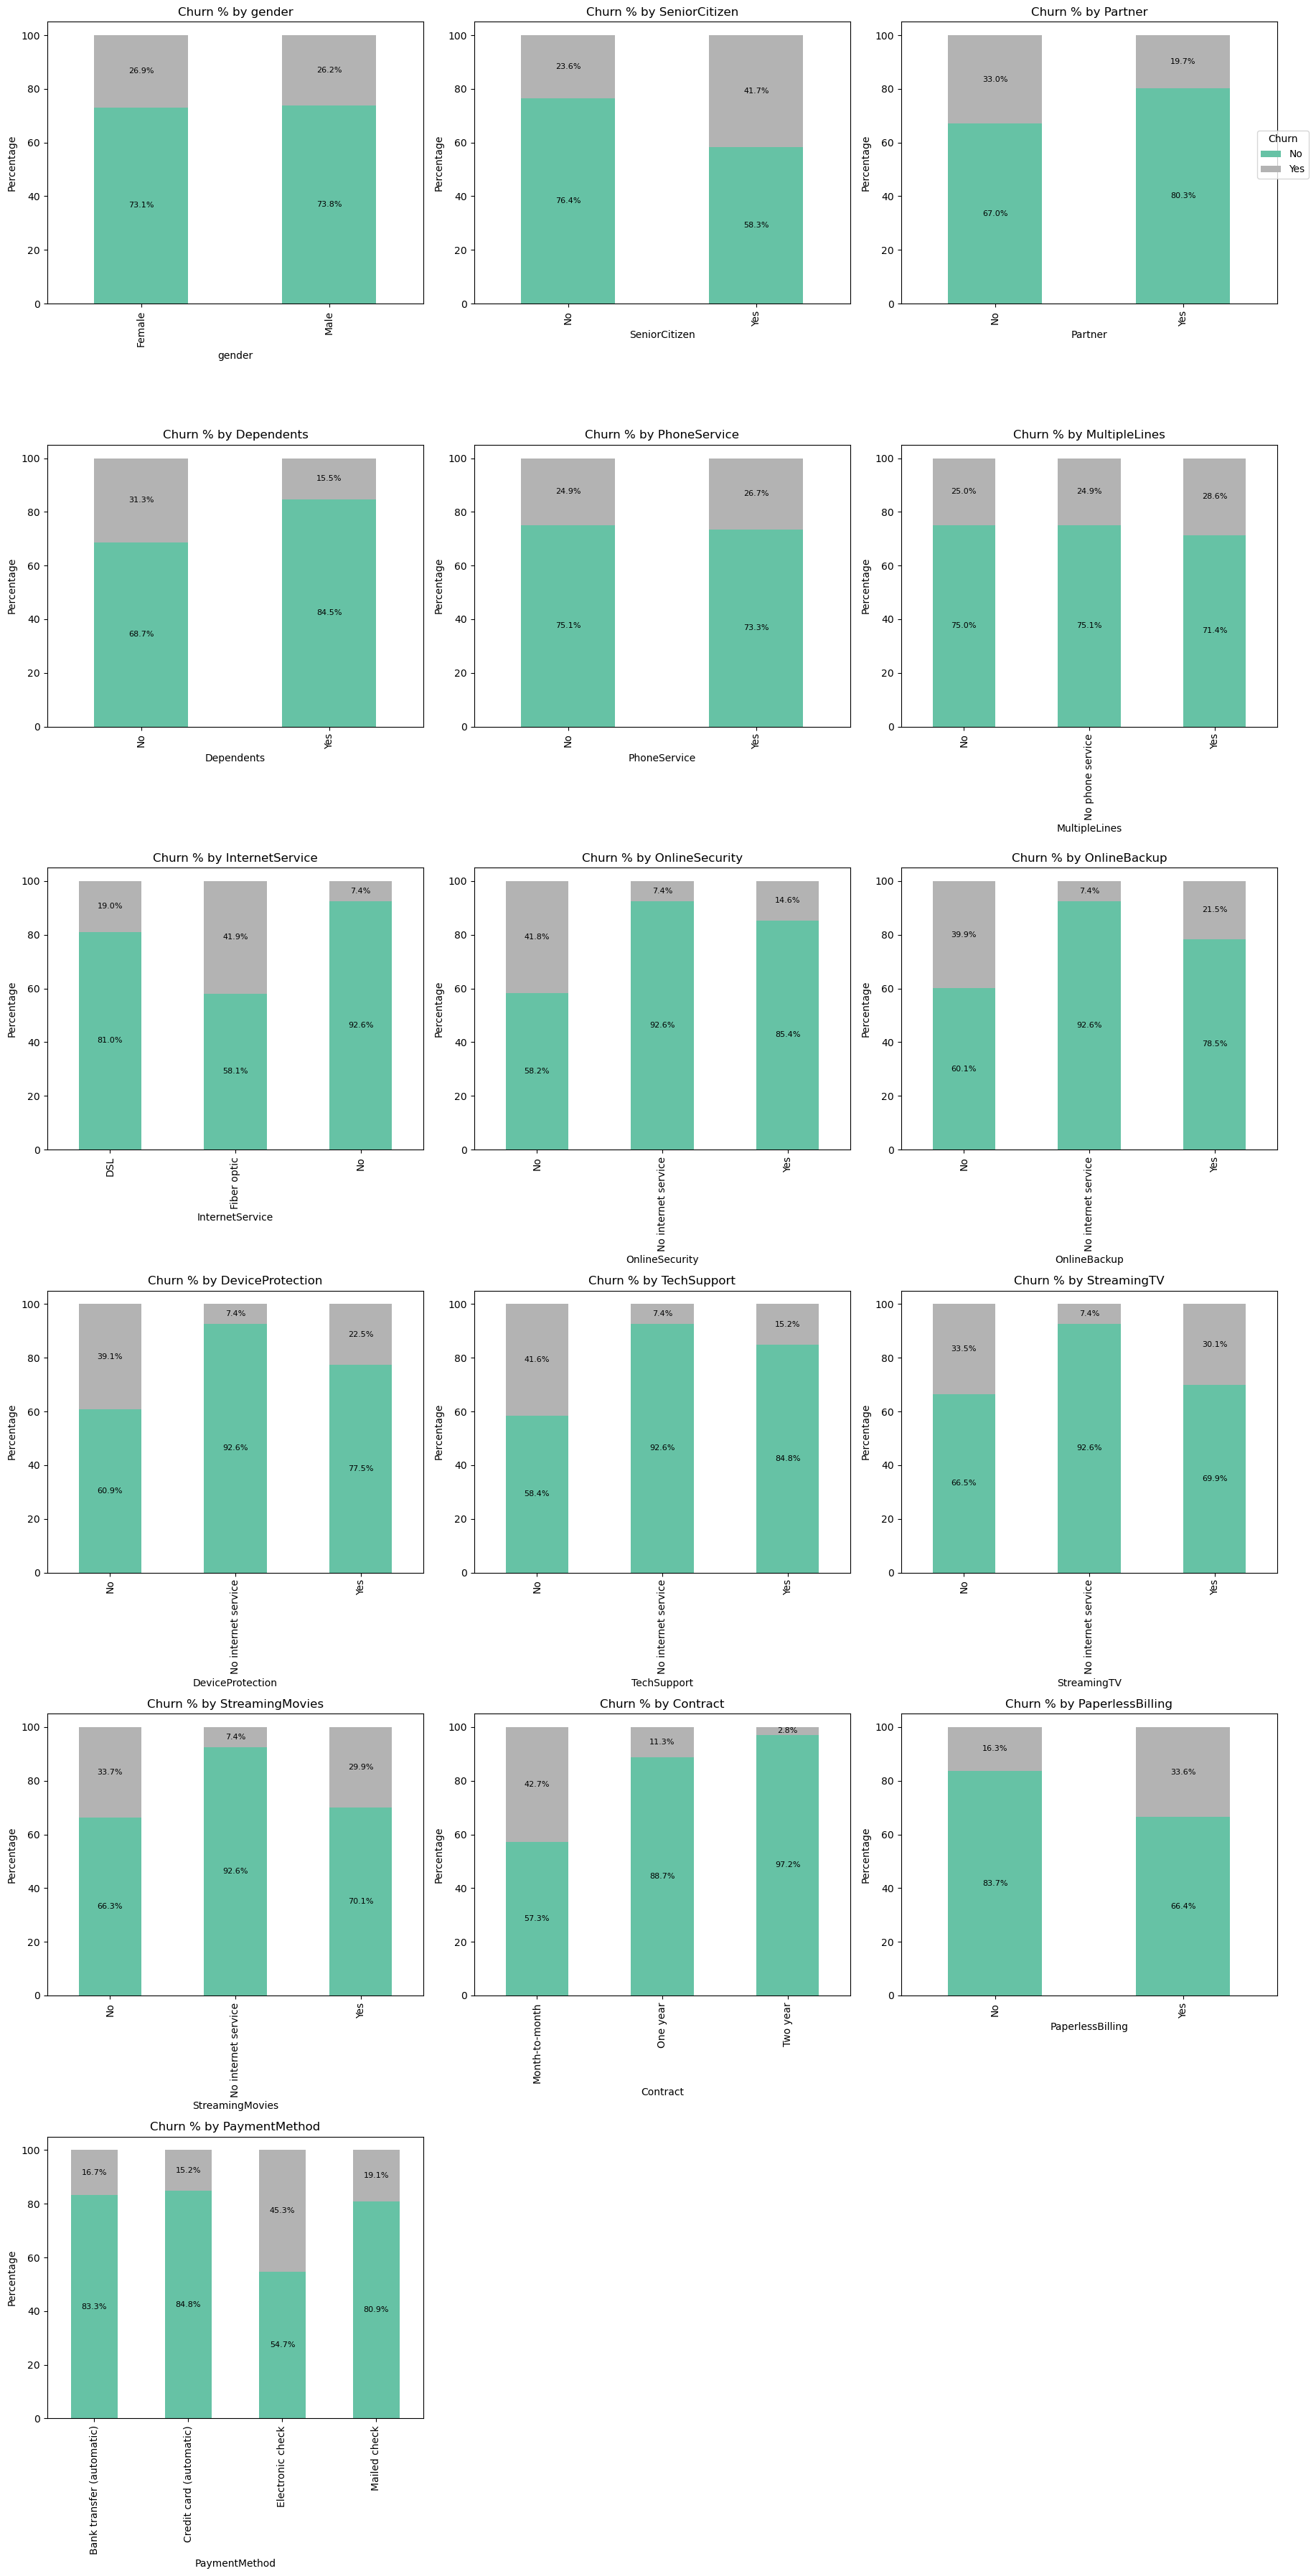

In [54]:


# Columns I want to analyze with respect to Churn
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
        'Contract', 'PaperlessBilling', 'PaymentMethod']

# Number of rows/cols for subplots (adjust based on number of charts)
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols   # auto-calc rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))

for ax, col in zip(axes.flatten(), cols):
    # Crosstab to get churn % by category
    ct = pd.crosstab(df_raw[col], df_raw['Churn'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, ax=ax, colormap="Set2", legend=False)
    
    # Add labels
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=8)
    
    ax.set_title(f"Churn % by {col}")
    ax.set_ylabel("Percentage")
    ax.set_xlabel(col)

# One common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Churn", bbox_to_anchor=(1.02, 0.95))

# Remove empty subplots if any
for ax in axes.flatten()[len(cols):]:
    ax.axis("off")
plt.tight_layout()
plt.show()


#### 9. Observations from above analysis
👥 Gender → Male and female customers have almost the same churn rate → gender is not a determining factor for churn.
👴 Senior Citizen → Senior citizens have a higher churn rate compared to non-seniors → possibly due to price sensitivity or special service needs
.
👫 Partner & Dependents → Customers without partners and dependents are more likely to chur
s.
🌐 Internet Service → Fiber optic has the highest churn, followed by DSL, while “No internet” has the lowest churn → likely influenced by price and performance expectatio
ns.
🛠 Add-on Internet → Not having additional services (Online Security, Backup, Tech Support, etc.) is associated with higher churn → presents upselling opportunit
ies.
📅 Contract → Month-to-month contracts have a much higher churn rate than 1-year or 2-year contracts → long-term contracts effectively reduce c
hurn.
📄 Paperless Billing → Customers with paperless billing have higher churn → often linked to flexible month-to-month cont
racts.
💳 Payment Method → Customers paying by electronic check have the highest churn, whereas bank transfer, credit card, and mailed check show lower churn → electronic check is common among high-risk customers.

#### 10. Analysis on Numeric Columns [ Tenure, MonthlylCharges]

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


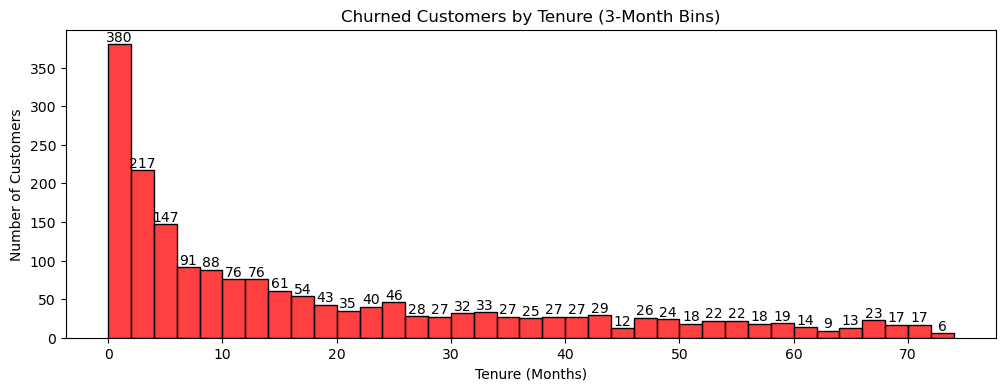

In [49]:
# Filter only churned customers
df_churned = df_raw[df_raw['Churn'] == 'Yes']

plt.figure(figsize = (12,4))
# Histogram with bin size = 3 months
ax = sns.histplot(data=df_churned, x='tenure', bins=range(0, df_churned['tenure'].max() + 3, 2), color="red")
# Add count labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')  # %d → integer count
plt.title("Churned Customers by Tenure (3-Month Bins)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


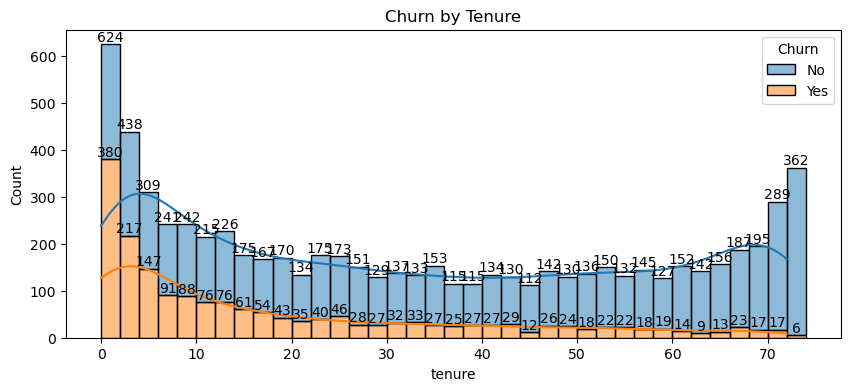

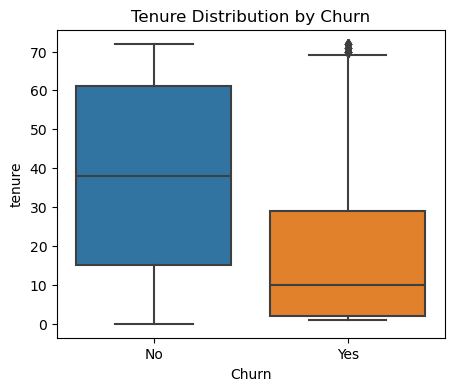

In [67]:
#### histogram chart
plt.figure(figsize=(10,4))
ax = sns.histplot(data=df_raw, x='tenure', hue='Churn', bins=range(0, df_raw['tenure'].max() + 3, 2), kde=True, multiple='stack')
# Add count labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')  # %d → integer count
plt.title("Churn by Tenure")
plt.show()


### box plot
plt.figure(figsize=(5,4))
sns.boxplot(data=df_raw, x='Churn', y='tenure')
plt.title("Tenure Distribution by Churn")
plt.show()

##### Customer gets churned mostly within initial months (0-12)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


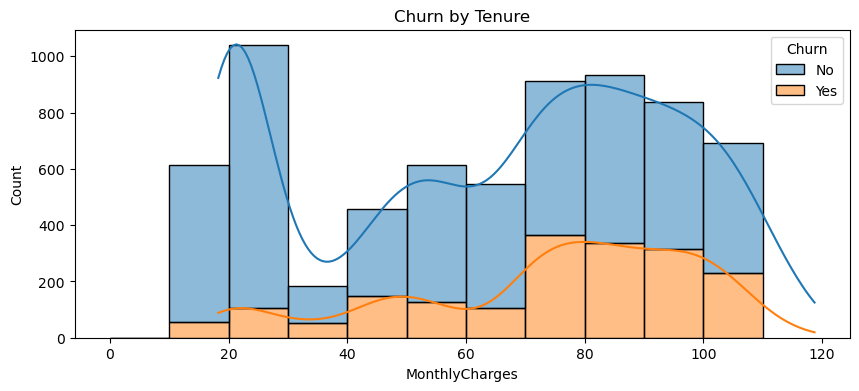

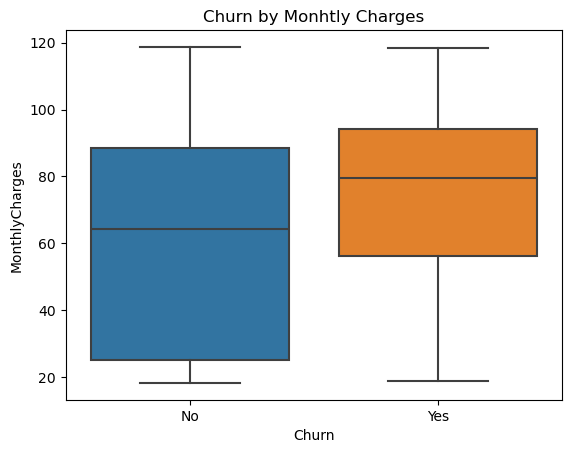

In [83]:
#### histogram chart
plt.figure(figsize=(10,4))
ax = sns.histplot(data=df_raw, x='MonthlyCharges', hue='Churn', bins=range(0,120 ,10), kde=True, multiple='stack')

plt.title("Churn by Tenure")
plt.show()

sns.boxplot(data = df_raw , x= 'Churn', y = 'MonthlyCharges')
plt.title("Churn by Monhtly Charges")
plt.show()

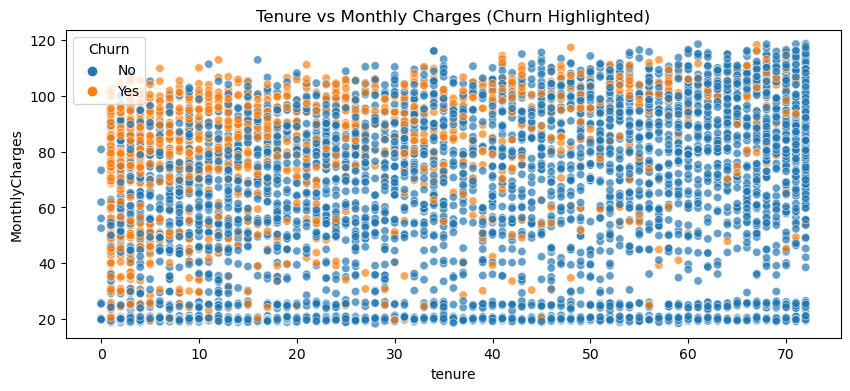

In [88]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df_raw, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.7)
plt.title("Tenure vs Monthly Charges (Churn Highlighted)")
plt.show()

##### Here we can clearly see that customer with High monhtly charges (mostly > $60) churned high specially if monhtly charges are high with less tenure

#### 11. Recommendations

In [102]:
print("""
Recommendations:
--------------------------------
1. Promote Longer-Term Contracts:
Offer discounts or added services (e.g., free streaming) for one- and two-year commitments.
Introduce loyalty bonuses for contract renewals before expiration.

2. Target High-Charge Customers:
Proactively identify customers with high monthly charges for personalized retention offers.
Create bundled plans that lower effective monthly costs.

3. Optimize Payment Options:
Encourage electronic payment methods with autopay benefits to reduce friction.
Provide reminders and simplified billing experiences for electronic check users.

4. Leverage Tenure-Based Loyalty:
Reward long-tenured customers with exclusive perks to reinforce retention.
Use tenure milestones (e.g., year anniversaries) as touchpoints for engagement.
""")


Recommendations:
--------------------------------
1. Promote Longer-Term Contracts:
Offer discounts or added services (e.g., free streaming) for one- and two-year commitments.
Introduce loyalty bonuses for contract renewals before expiration.

2. Target High-Charge Customers:
Proactively identify customers with high monthly charges for personalized retention offers.
Create bundled plans that lower effective monthly costs.

3. Optimize Payment Options:
Encourage electronic payment methods with autopay benefits to reduce friction.
Provide reminders and simplified billing experiences for electronic check users.

4. Leverage Tenure-Based Loyalty:
Reward long-tenured customers with exclusive perks to reinforce retention.
Use tenure milestones (e.g., year anniversaries) as touchpoints for engagement.



#### 12. Executive Summary of the Report

In [107]:
df = df_raw
# Create a comprehensive executive summary report
print("EXECUTIVE SUMMARY REPORT")
print("=" * 60)
print("CUSTOMER CHURN ANALYSIS - TELECOM COMPANY")
print("Analysis Date: August 2025")
print("=" * 60)

# Key metrics summary
total_customers = len(df)
churned_customers = len(df[df['Churn'] == 'Yes'])
churn_rate = (churned_customers / total_customers) * 100
retained_customers = total_customers - churned_customers
retention_rate = 100 - churn_rate

print(f"\nKEY PERFORMANCE INDICATORS:")
print(f"{'='*35}")
print(f"Total Customers:        {total_customers:,}")
print(f"Churned Customers:      {churned_customers:,}")
print(f"Retained Customers:     {retained_customers:,}")
print(f"Churn Rate:             {churn_rate:.1f}%")
print(f"Retention Rate:         {retention_rate:.1f}%")

# Revenue impact
monthly_revenue = df['MonthlyCharges'].sum()
churned_revenue = df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()
revenue_impact_pct = (churned_revenue / monthly_revenue) * 100

print(f"\nREVENUE IMPACT:")
print(f"{'='*20}")
print(f"Total Monthly Revenue:     ${monthly_revenue:,.2f}")
print(f"Lost Monthly Revenue:      ${churned_revenue:,.2f}")
print(f"Revenue Impact:            {revenue_impact_pct:.1f}%")
print(f"Projected Annual Loss:     ${churned_revenue * 12:,.2f}")

# Top risk factors
print(f"\nTOP CHURN RISK FACTORS:")
print(f"{'='*25}")
print("1. Month-to-month contracts (42.7% churn rate)")
print("2. New customers 0-12 months (47.4% churn rate)")
print("3. Electronic check payment (45.3% churn rate)")
print("4. Fiber optic internet service (41.9% churn rate)")
print("5. No Tech Support (41.6% churn rate)")

# Business recommendations
print(f"\nIMMEDIATE ACTIONS REQUIRED:")
print(f"{'='*30}")
print("1. CONTRACT CONVERSION PROGRAM")
print("   - Target 3,875 month-to-month customers")
print("   - Offer 20-30% discounts for longer contracts")
print("   - Potential impact: 10-15% churn reduction")

print("\n2. PAYMENT METHOD MIGRATION")
print("   - Convert 2,365 electronic check users")
print("   - Incentivize automatic payments")
print("   - Potential impact: 8-12% churn reduction")

print("\n3. NEW CUSTOMER ONBOARDING")
print("   - 90-day intensive support program")
print("   - Regular check-ins and proactive support")
print("   - Potential impact: 15-20% early churn reduction")

# Financial projections
print(f"\nFINANCIAL PROJECTIONS:")
print(f"{'='*22}")

current_monthly_loss = 139130.85
current_churn_rate = 26.5

print("SCENARIO 1 - Conservative (Churn reduced to 20%):")
conservative_reduction = (26.5 - 20) / 26.5
conservative_savings = current_monthly_loss * conservative_reduction
print(f"• Monthly revenue saved: ${conservative_savings:,.2f}")
print(f"• Annual revenue saved: ${conservative_savings * 12:,.2f}")

print("\nSCENARIO 2 - Moderate (Churn reduced to 15%):")
moderate_reduction = (26.5 - 15) / 26.5
moderate_savings = current_monthly_loss * moderate_reduction
print(f"• Monthly revenue saved: ${moderate_savings:,.2f}")
print(f"• Annual revenue saved: ${moderate_savings * 12:,.2f}")

print("\nSCENARIO 3 - Aggressive (Churn reduced to 12%):")
aggressive_reduction = (26.5 - 12) / 26.5
aggressive_savings = current_monthly_loss * aggressive_reduction
print(f"• Monthly revenue saved: ${aggressive_savings:,.2f}")
print(f"• Annual revenue saved: ${aggressive_savings * 12:,.2f}")

# Success metrics
print(f"\nSUCCESS METRICS TO MONITOR:")
print(f"{'='*30}")
print("• Monthly churn rate")
print("• Contract conversion rates")
print("• Payment method migration rates")
print("• New customer retention")
print("• retention by different segment")
print("• Customer lifetime value")

print(f"\nNEXT STEPS CAN BE:")
print(f"{'='*12}")
print("1. Secure executive approval for retention budget")
print("2. Form cross-functional churn reduction task force")
print("3. Begin contract incentive program design")
print("4. Implement customer risk scoring system")
print("5. Schedule monthly performance reviews")

print("\n" + "=" * 20 + "END OF Report" + "=" * 20)


EXECUTIVE SUMMARY REPORT
CUSTOMER CHURN ANALYSIS - TELECOM COMPANY
Analysis Date: August 2025

KEY PERFORMANCE INDICATORS:
Total Customers:        7,043
Churned Customers:      1,869
Retained Customers:     5,174
Churn Rate:             26.5%
Retention Rate:         73.5%

REVENUE IMPACT:
Total Monthly Revenue:     $456,116.60
Lost Monthly Revenue:      $139,130.85
Revenue Impact:            30.5%
Projected Annual Loss:     $1,669,570.20

TOP CHURN RISK FACTORS:
1. Month-to-month contracts (42.7% churn rate)
2. New customers 0-12 months (47.4% churn rate)
3. Electronic check payment (45.3% churn rate)
4. Fiber optic internet service (41.9% churn rate)
5. No Tech Support (41.6% churn rate)

IMMEDIATE ACTIONS REQUIRED:
1. CONTRACT CONVERSION PROGRAM
   - Target 3,875 month-to-month customers
   - Offer 20-30% discounts for longer contracts
   - Potential impact: 10-15% churn reduction

2. PAYMENT METHOD MIGRATION
   - Convert 2,365 electronic check users
   - Incentivize automatic paymen

In [108]:
!pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/128.0 kB ? eta -:--:--
   -------------------------------------- - 122.9/128.0 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 128.0/128.0 kB 1.9 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34822 sha256=72712e9a314c5f8866f2a7377c75b34b5f3d967dc43fe72563fbe72f477fe06e
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\4f\d7\32\c6c9b7b05e852e920fd72174487be3a0f18e633a7adcc303be
Successfully built pandoc
